In [1]:
from sklearn import svm
import numpy as np

train_path = "./Encoding_result/train_ptm.txt"
test_path = "./Encoding_result/test_ptm.txt"

# read and convert train path data to numpy array
train_data = np.loadtxt(train_path, delimiter=',')
print (train_data[2:4])

# divided train_data two featues and label first index is label
train_label = train_data[:, 0]
train_features = train_data[:, 1:]

# print (train_label[2:4])
# print (train_features[2:4])

format = "csv" # choices=['tsv', 'svm', 'csv', 'weka']
kernel = "rbf" #choices=['linear', 'poly', 'rbf', 'sigmoid']
auto = 'False' #auto optimize parameters
batch = 0.4 #random select part (batch * samples) samples for parameters optimization
degree = 3 #set degree in polynomial kernel function (default 3)
gamma = 'auto' #set gamma in polynomial/rbf/sigmoid kernel function (default 1/k)
coef0 = 0 #set coef0 in polynomial/rbf/sigmoid kernel function (default 0)
cost = 1  #set the parameter cost value (default 1)
fold = 8 #n-fold cross validation mode (default 5-fold cross-validation, 1 means jack-knife cross-validation)
out = 'SVM' #set prefix for output score file


clf = svm.SVC(kernel=kernel, C=cost, gamma=gamma, coef0=coef0, degree=degree)
clf.fit(train_features, train_label)


[[ 1.          0.04761905  0.          0.04761905  0.0952381   0.
   0.0952381   0.          0.          0.14285714  0.          0.
   0.04761905  0.14285714  0.0952381   0.          0.04761905  0.04761905
   0.04761905  0.          0.0952381 ]
 [-1.          0.23809524  0.          0.          0.04761905  0.
   0.04761905  0.          0.          0.          0.          0.
   0.          0.19047619  0.          0.          0.19047619  0.28571429
   0.          0.          0.        ]]


SVC(C=1, coef0=0, gamma='auto')

In [2]:
test_path = "./Encoding_result/test_ptm.txt"

# read and convert train path data to numpy array
test_data = np.loadtxt(test_path, delimiter=',')
print (test_data[2:4])

# divided test_data two featues and label first index is label
test_label = test_data[:, 0]
test_features = test_data[:, 1:]

[[ 1.          0.04761905  0.          0.0952381   0.04761905  0.0952381
   0.          0.04761905  0.0952381   0.0952381   0.28571429  0.
   0.          0.04761905  0.          0.          0.          0.04761905
   0.          0.          0.04761905]
 [-1.          0.04761905  0.          0.14285714  0.04761905  0.
   0.0952381   0.04761905  0.0952381   0.          0.0952381   0.
   0.04761905  0.04761905  0.          0.          0.04761905  0.0952381
   0.04761905  0.04761905  0.0952381 ]]


In [3]:
test_label[:10]

array([ 1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.])

In [4]:
y_pred = clf.predict(test_features[:])

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label, y_pred)

array([[693, 220],
       [204, 688]], dtype=int64)

C:\Users\tc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


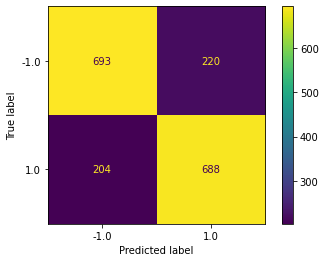

In [6]:
import matplotlib.pyplot as  plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_features, test_label)
plt.show()

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label, y_pred)

0.7650969529085873

              precision    recall  f1-score   support

        -1.0       0.77      0.76      0.77       913
         1.0       0.76      0.77      0.76       892

    accuracy                           0.77      1805
   macro avg       0.77      0.77      0.77      1805
weighted avg       0.77      0.77      0.77      1805



C:\Users\tc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


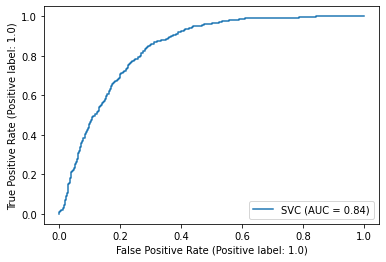

In [8]:
from sklearn.metrics import classification_report
print(classification_report(test_label, y_pred))

from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, test_features, test_label) 